#### Extraemos de la base de datos las variables indepencientes (X) y la dependiente (y)

In [55]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.cluster import KMeans


ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

# Pasamos a array la variable que queremos predecir ('actual')
y = np.array(ENS_2017_valida_2['Salud_percibida'])
# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
# axis 1 se refiere a las columnas
X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))
X.shape



(23089, 35)

In [56]:
# Dividimos en muestra de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## Método Kmeans

#### Determinamos el número de Clusters óptimo en la muestra de entrenamiento

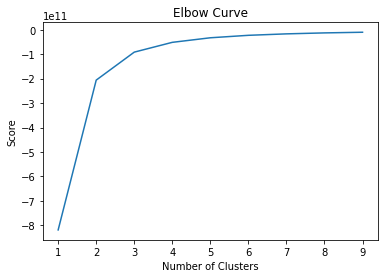

In [57]:
# Identificamos el número de clústers más adecuado viendo en una gráfica cual puede ser el elbow (codo). El número de clústers a partir del cual ya no aumenta de forma importante el score
import matplotlib.pyplot as plt

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# UTILIZAREMOS 4 CLÚSTERS

# 4 Clústers

### Kmeans. Muestra de entrenamiento

In [58]:
# establecemos el modelo de cluster con Kmeans

kmeans_train = KMeans(n_clusters=4, random_state=42).fit(X_train)
print("kmeans.labels_:", kmeans_train.labels_)
predict_train = kmeans_train.predict(X_train)
print("\npredict:", predict_train)
clusters_train = kmeans_train.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_train}')

kmeans.labels_: [3 1 3 ... 2 2 3]

predict: [3 1 3 ... 2 2 3]

KMeans cluster centers 3:
 [[8.66088494e+03 9.84058282e+00 1.53010499e+00 5.40276409e+01
  2.35868867e+00 1.06278123e+00 1.94943218e+00 2.05035355e+00
  5.74823227e+00 1.74651811e+00 1.02485537e+00 1.03085494e+00
  1.81208485e+00 1.83222627e+00 7.27030212e+01 1.98778659e+00
  1.68223698e+00 2.92264838e+00 3.64173988e+00 3.50117849e+00
  2.87615170e+00 1.34476109e+00 2.06213842e+00 3.76173130e+00
  3.61667024e+00 1.38311549e+00 3.27683737e+00 4.93164774e+00
  4.49925005e+00 3.88515106e+00 3.09620741e+00 5.54381830e+00
  3.93550461e+00 3.97728734e+00 2.68823655e+00]
 [2.02121673e+04 8.14820490e+00 1.54487741e+00 5.33450088e+01
  2.47898424e+00 1.05100701e+00 1.93388792e+00 2.08493870e+00
  5.80297723e+00 1.77451839e+00 1.02889667e+00 1.03305604e+00
  1.78787215e+00 1.85573555e+00 7.28211471e+01 1.92819615e+00
  1.83690893e+00 2.96278459e+00 3.69570928e+00 3.58537653e+00
  3.07815236e+00 1.34763573e+00 2.05297723e+00 3.8820052

In [59]:
k_train_score = metrics.accuracy_score(y_train, predict_train)
print(f'K_train_Score: {k_train_score.round(2)}')


K_train_Score: 0.25


### Kmeans. Muestra de test


In [60]:
kmeans_test = KMeans(n_clusters=4, random_state=42).fit(X_test)
print("kmeans.labels_:", kmeans_test.labels_)
predict_test = kmeans_test.predict(X_test)
print("\npredict:", predict_test)
clusters_test = kmeans_test.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_test}')

kmeans.labels_: [2 3 1 ... 1 0 1]

predict: [2 3 1 ... 1 0 1]

KMeans cluster centers 3:
 [[8.42766174e+03 9.44085028e+00 1.52680222e+00 5.44066543e+01
  2.40850277e+00 1.04990758e+00 1.96395564e+00 2.04158965e+00
  5.66820702e+00 1.74121996e+00 1.03049908e+00 1.03881701e+00
  1.81330869e+00 1.84565619e+00 7.24269871e+01 2.00462107e+00
  1.66081331e+00 2.92883549e+00 3.61090573e+00 3.48059150e+00
  2.88262477e+00 1.35489834e+00 2.06469501e+00 3.71164510e+00
  3.56561922e+00 1.39556377e+00 3.31885397e+00 4.94085028e+00
  4.47689464e+00 3.85027726e+00 3.10998152e+00 5.65526802e+00
  3.90295749e+00 4.08687616e+00 2.68484288e+00]
 [2.00680426e+04 7.99357430e+00 1.52851406e+00 5.40441767e+01
  2.46666667e+00 1.05863454e+00 1.88192771e+00 2.05783133e+00
  5.73654618e+00 1.75823293e+00 1.03052209e+00 1.02329317e+00
  1.77991968e+00 1.85943775e+00 7.42546185e+01 1.93654618e+00
  1.81285141e+00 2.98795181e+00 3.66104418e+00 3.58072289e+00
  3.06024096e+00 1.38232932e+00 2.05863454e+00 3.8706827

In [61]:
k_test_score = metrics.accuracy_score(y_test, predict_test)
print(f'K_train_Score: {k_test_score.round(2)}')

K_train_Score: 0.26


## Datos estandarizados

### Kmeans. Muestra de entrenamiento

In [62]:
# Normalizamos los datos
X_train_N = StandardScaler().fit_transform(X_train)

In [63]:
kmeans_train_N = KMeans(n_clusters=4, random_state=42).fit(X_train_N)
print("kmeans.labels_:", kmeans_train_N.labels_)
predict_train = kmeans_train_N.predict(X_train_N)
print("\npredict:", predict_train)
clusters_train = kmeans_train_N.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_train}')

kmeans.labels_: [3 3 2 ... 3 3 1]

predict: [3 3 2 ... 3 3 1]

KMeans cluster centers 3:
 [[-1.26472484e-01 -8.83539103e-02 -1.55104416e-01 -1.06193915e+00
   1.69471227e-01  3.88215447e-01  4.94685568e-01 -5.49596893e-01
  -3.13124382e-02  4.32053716e-01  3.36031029e+00  3.54664052e+00
   3.80417089e-01  3.27100283e-01 -2.61954094e-01  2.12819035e-01
   4.80172575e-01 -1.83839445e-01 -1.49382466e-01  2.36934489e-01
  -1.78087380e-01  3.66179048e-03  4.09204108e-01  4.45936062e-02
  -2.29122780e-01  1.08948704e-01 -2.27076220e-01 -6.18022485e-01
  -8.02684801e-02  1.97888474e-02  3.39664349e-02  1.94560292e-01
  -6.82692282e-04  1.32736355e-01 -3.89149954e-01]
 [-1.42556131e-02 -1.81873060e-02  2.40289964e-01  9.65318393e-01
   7.28278333e-01 -1.72204059e-01  6.33788163e-02  3.80180905e-01
  -7.78470250e-01 -7.43974780e-01 -1.67578065e-01 -1.75859448e-01
  -2.18393078e-01 -2.44517142e-01 -9.95543222e-03 -3.44974522e-01
  -3.02811087e-01  2.80198737e-01  1.28657459e-01 -1.55244110e-01
 

In [64]:
k_train_N_score = metrics.accuracy_score(y_train, predict_train)
print(f'K_train_N_Score: {k_train_N_score.round(2)}')

K_train_N_Score: 0.21


### Kmeans. Muestra de test 

In [65]:
# Normalizamos los datos
X_test_N = StandardScaler().fit_transform(X_test)

In [66]:
kmeans_test_N = KMeans(n_clusters=4, random_state=42).fit(X_test_N)
print("kmeans.labels_:", kmeans_test_N.labels_)
predict_test = kmeans_test_N.predict(X_test_N)
print("\npredict:", predict_test)
clusters_test = kmeans_test_N.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_test}')

kmeans.labels_: [2 0 2 ... 1 0 2]

predict: [2 0 2 ... 1 0 2]

KMeans cluster centers 3:
 [[ 0.00612344 -0.00583549  0.29912859  0.96269382  0.75459151 -0.16418822
   0.0629554   0.32461102 -0.75897872 -0.75488889 -0.17616388 -0.17098547
  -0.21008303 -0.21514965 -0.05094503 -0.36817563 -0.30970833  0.31847745
   0.14312683 -0.18707031  0.06830476 -0.11622493 -0.08660895 -0.0378173
   0.36213936 -0.05552988  0.1462195   0.57321142  0.17965667 -0.27982956
   0.39081654  0.36901293  0.03751656  0.31635866  0.25636263]
 [-0.00614998 -0.08178031 -0.78131586 -0.32328913 -0.47236982  0.04833893
  -0.11392321 -0.06007002  0.05559175  0.37111884 -0.17616388 -0.17485289
   0.07121315  0.09117095  0.70989941 -0.06864442  0.41455759 -0.30390616
  -0.04532203  0.23885523 -0.09914358 -0.04301805  0.31618725 -0.01110855
  -0.46234232  0.00971658 -0.10461475 -0.43144907  0.22138862 -0.34282668
  -0.47078316 -0.49647182 -0.13089946  0.17470814  0.41591944]
 [ 0.02340673  0.10428679  0.38910997 -0.5293

In [67]:
k_test_N_score = metrics.accuracy_score(y_test, predict_test)
print(f'K_test_N_Score: {k_test_N_score.round(2)}')

K_test_N_Score: 0.27


# 3 Clústers. Igual que los valores de la VD

In [68]:
ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

# Pasamos a array la variable que queremos predecir ('actual')
y = np.array(ENS_2017_valida_2['Salud_percibida'])
# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
# axis 1 se refiere a las columnas
X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))
X.shape

(23089, 35)

In [69]:
# Dividimos en muestra de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Kmeans. Muestra de entrenamiento

In [70]:
# establecemos el modelo de cluster con Kmeans

kmeans_train = KMeans(n_clusters=3, random_state=42).fit(X_train)
print("kmeans.labels_:", kmeans_train.labels_)
predict_train = kmeans_train.predict(X_train)
print("\npredict:", predict_train)
clusters_train = kmeans_train.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_train}')

kmeans.labels_: [1 0 1 ... 2 2 0]

predict: [1 0 1 ... 2 2 0]

KMeans cluster centers 3:
 [[1.92048098e+04 7.72967282e+00 1.54324587e+00 5.34036281e+01
  2.47100745e+00 1.04842890e+00 1.94088111e+00 2.09199870e+00
  5.76336249e+00 1.77632005e+00 1.02607710e+00 1.02802073e+00
  1.78701004e+00 1.85017817e+00 7.28312277e+01 1.94671202e+00
  1.81778426e+00 3.06073858e+00 3.71914480e+00 3.61499838e+00
  3.01490120e+00 1.36977648e+00 2.14123745e+00 3.88111435e+00
  3.51522514e+00 1.36993845e+00 3.37755102e+00 4.98380305e+00
  4.41690962e+00 3.97635245e+00 3.06073858e+00 5.71509556e+00
  4.02121801e+00 3.99595076e+00 2.67622287e+00]
 [1.15036306e+04 1.08091615e+01 1.54159922e+00 5.33439624e+01
  2.38993202e+00 1.06846876e+00 1.92910327e+00 2.07397216e+00
  5.86581418e+00 1.75153771e+00 1.02606021e+00 1.02670767e+00
  1.81595986e+00 1.83376497e+00 7.22393979e+01 2.02784073e+00
  1.73794108e+00 2.86500486e+00 3.57559081e+00 3.62431208e+00
  3.01877630e+00 1.34558109e+00 1.99158304e+00 3.7649724

In [71]:
k_train_score = metrics.accuracy_score(y_train, predict_train)
print(f'K_train_Score: {k_train_score.round(2)}')

K_train_Score: 0.3


### Kmeans. Muestra de test

In [72]:
# establecemos el modelo de cluster con Kmeans

kmeans_test = KMeans(n_clusters=3, random_state=42).fit(X_test)
print("kmeans.labels_:", kmeans_test.labels_)
predict_test = kmeans_test.predict(X_test)
print("\npredict:", predict_test)
clusters_test = kmeans_test.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_test}')

kmeans.labels_: [1 2 0 ... 0 1 0]

predict: [1 2 0 ... 0 1 0]

KMeans cluster centers 3:
 [[1.93726094e+04 7.85583224e+00 1.52883355e+00 5.36513761e+01
  2.45543906e+00 1.05111402e+00 1.90563565e+00 2.05570118e+00
  5.72018349e+00 1.76867628e+00 1.02948886e+00 1.02228047e+00
  1.78374836e+00 1.85648755e+00 7.39547837e+01 1.95150721e+00
  1.80996068e+00 3.04390564e+00 3.67300131e+00 3.59633028e+00
  2.99475754e+00 1.41480996e+00 2.14220183e+00 3.87352556e+00
  3.50720839e+00 1.38925295e+00 3.43512451e+00 4.98427261e+00
  4.44036697e+00 3.98165138e+00 3.06422018e+00 5.56094364e+00
  4.01769332e+00 4.03931848e+00 2.73853211e+00]
 [3.98502268e+03 7.58538122e+00 1.52804033e+00 5.39647133e+01
  2.42344045e+00 1.06931317e+00 1.89540013e+00 2.06868305e+00
  5.59861374e+00 1.77504726e+00 1.03339635e+00 1.03780718e+00
  1.82671708e+00 1.85129175e+00 7.28052930e+01 1.85507246e+00
  1.71266541e+00 3.01386263e+00 3.76811594e+00 3.57971014e+00
  2.60743541e+00 1.27410208e+00 1.96534342e+00 3.7422810

In [73]:
k_test_score = metrics.accuracy_score(y_test, predict_test)
print(f'K_test_Score: {k_test_score.round(2)}')

K_test_Score: 0.3


## Datos estandarizados

In [74]:
# Normalizamos los datos
X_train_N = StandardScaler().fit_transform(X_train)

### Kmeans. Muestra de entrenamiento

In [75]:
kmeans_train_N = KMeans(n_clusters=3, random_state=42).fit(X_train_N)
print("kmeans.labels_:", kmeans_train_N.labels_)
predict_train = kmeans_train_N.predict(X_train_N)
print("\npredict:", predict_train)
clusters_train = kmeans_train_N.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_train}')

kmeans.labels_: [1 1 0 ... 1 1 2]

predict: [1 1 0 ... 1 1 2]

KMeans cluster centers 3:
 [[ 5.34031238e-02  9.72353790e-02  1.43876087e-01 -2.87581942e-01
  -4.61789374e-01 -8.24281923e-02 -2.03996242e-01 -2.83565057e-02
   8.66251707e-01  3.03554912e-01 -1.12679319e-01 -1.41230253e-01
  -4.72925426e-02 -2.81124917e-02 -2.32422278e-01  4.55006371e-01
  -2.95541745e-01  4.47230681e-02 -2.55558085e-02 -1.85975743e-01
   1.48533902e-01  1.20722364e-01 -3.51008221e-01  4.39960928e-02
   8.54886696e-02  8.03016020e-02  9.47218061e-02  5.56706405e-02
  -3.55848558e-01  5.00980504e-01  1.54360361e-02 -1.86607602e-01
   6.74248984e-02 -7.14172392e-01 -3.09933799e-01]
 [-3.47881312e-02 -7.51199584e-02 -3.71255492e-01 -7.55955527e-01
  -2.80462502e-01  2.92382643e-01  1.75490280e-01 -3.99196166e-01
  -5.39900236e-02  4.46829362e-01  2.95701726e-01  3.30158173e-01
   2.97710262e-01  2.85635625e-01  2.05812027e-01 -1.01338606e-01
   6.57552239e-01 -3.46418832e-01 -1.15067330e-01  3.57356582e-01
 

In [76]:
k_train_N_score = metrics.accuracy_score(y_train, predict_train)
print(f'K_train_N_Score: {k_train_N_score.round(2)}')

K_train_N_Score: 0.37


### Kmeans. Muestra de test

In [77]:
# Normalizamos los datos
X_test_N = StandardScaler().fit_transform(X_test)

In [78]:
kmeans_test_N = KMeans(n_clusters=3, random_state=42).fit(X_test_N)
print("kmeans.labels_:", kmeans_test_N.labels_)
predict_test = kmeans_test_N.predict(X_test_N)
print("\npredict:", predict_test)
clusters_test = kmeans_test_N.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters_test}')

kmeans.labels_: [2 0 2 ... 2 0 2]

predict: [2 0 2 ... 2 0 2]

KMeans cluster centers 3:
 [[-0.01135105  0.00273449  0.23883849  0.9042438   0.68732111 -0.17671236
   0.04117714  0.32581055 -0.77602128 -0.67237769 -0.16556117 -0.15705716
  -0.21016789 -0.20011375  0.01654765 -0.35732493 -0.3092593   0.27396663
   0.15430803 -0.16405206  0.05496829 -0.10605428 -0.07784489 -0.03371713
   0.30755352 -0.05934892  0.13593347  0.54495948  0.20734353 -0.30232105
   0.33300641  0.30703516  0.0099072   0.37107239  0.30739652]
 [-0.06810037 -0.15131326 -0.38251154 -0.74604835 -0.28986094  0.35001298
   0.26539867 -0.32498144 -0.04149033  0.46375105  0.32957133  0.35185871
   0.28270203  0.27454556  0.21005954 -0.14972043  0.74325643 -0.29585021
  -0.07420075  0.41658373 -0.2524637  -0.01318347  0.48215431 -0.01572166
  -0.45540854  0.02301352 -0.25667379 -0.68212139  0.15866268 -0.15994001
  -0.47835792 -0.12952177 -0.10266788  0.35116678 -0.03010353]
 [ 0.06903311  0.12459567  0.07612195 -0.303

In [79]:
k_test_N_score = metrics.accuracy_score(y_test, predict_test)
print(f'K_test_N_Score: {k_test_N_score.round(2)}')

K_test_N_Score: 0.29


## Aplicamos el modelo a todos los datos. Con 3 Clúster sin normalizar. Es el modelo en el que se obtienen un mejor Score

In [80]:
ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

y = np.array(ENS_2017_valida_2['Salud_percibida'])

X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))


### Kmeans. Base completa

In [81]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
print("kmeans.labels_:", kmeans.labels_)
predict = kmeans.predict(X)
print("\npredict:", predict)
clusters = kmeans.cluster_centers_
print(f'\nKMeans cluster centers 3:\n {clusters}')

kmeans.labels_: [2 2 2 ... 1 1 1]

predict: [2 2 2 ... 1 1 1]

KMeans cluster centers 3:
 [[1.15215000e+04 1.07767672e+01 1.54534823e+00 5.33778586e+01
  2.39851871e+00 1.06795738e+00 1.92918399e+00 2.07445426e+00
  5.87409044e+00 1.75272869e+00 1.02598753e+00 1.02702703e+00
  1.81704782e+00 1.83575884e+00 7.22544179e+01 2.03417360e+00
  1.72479210e+00 2.86772349e+00 3.57276507e+00 3.62240125e+00
  3.01858108e+00 1.34979210e+00 1.99051455e+00 3.76273389e+00
  3.63240644e+00 1.40059771e+00 3.16930873e+00 4.98999480e+00
  4.40059771e+00 4.02936590e+00 3.06496881e+00 5.53404366e+00
  3.93308212e+00 3.93620062e+00 2.67762474e+00]
 [1.92290000e+04 7.74297189e+00 1.54035497e+00 5.34503174e+01
  2.46949087e+00 1.04922917e+00 1.93444747e+00 2.08433735e+00
  5.75722244e+00 1.77458220e+00 1.02668739e+00 1.02681695e+00
  1.78637129e+00 1.85153517e+00 7.30513020e+01 1.94869802e+00
  1.81552015e+00 3.05583625e+00 3.70734551e+00 3.61264412e+00
  3.00816168e+00 1.37699184e+00 2.14211685e+00 3.8800362

In [82]:
k_score = metrics.accuracy_score(y, predict)
print(f'K_Score: {k_score.round(2)}')

K_Score: 0.3


## Vemos si mejora el modelo de 3 Clúster sin normalizar reduciendo las variables con PCA (análisis de componentes principales) 

In [83]:
from sklearn.decomposition import PCA

pca_5 = PCA(n_components=5)
pca_4 = PCA(n_components=4)
pca_3 = PCA(n_components=3)

### 5 componentes principales

In [84]:
pca_5.fit(X)

PCA(n_components=5)

In [85]:
X_pca5 = pca_5.transform(X)

In [86]:
# Mostramos las varianzas explicativas

print('PCA 5\n')
print(f'Varianza explicativa \n{pca_5.explained_variance_ratio_}')
total_var_pca_5 = pca_5.explained_variance_ratio_.sum() * 100
print(f'\nTotal varianza explicativa: \n{total_var_pca_5.round(2)}')

PCA 5

Varianza explicativa 
[9.99985603e-01 8.08773620e-06 4.83006978e-06 5.77834314e-07
 1.90762272e-07]

Total varianza explicativa: 
100.0


In [87]:
# Para PCA 5
print('\nPARA PCA 5:\n')
kmeans_pca_5 = KMeans(n_clusters=3, random_state=11).fit(X_pca5)
print("kmeans.labels_:", kmeans_pca_5.labels_)
predict_pca_5 = kmeans_pca_5.predict(X_pca5)
print("\npredict:", predict_pca_5)
clusters_pca_5 = kmeans_pca_5.cluster_centers_
print(f'\nKMeans cluster centers con PCA 5:\n {clusters_pca_5}')


PARA PCA 5:

kmeans.labels_: [1 1 1 ... 0 0 0]

predict: [1 1 1 ... 0 0 0]

KMeans cluster centers con PCA 5:
 [[-7.72449999e+03 -1.53065889e-02  2.05869511e-01 -1.18844861e+00
  -9.77503111e-02]
 [ 7.66800003e+03  9.28719249e-03  1.43383995e-01 -8.12608426e-01
  -6.36395305e-02]
 [-5.65000389e+01  5.83923281e-03 -3.48817460e-01  1.99842782e+00
   1.61149903e-01]]


In [88]:
k_pca5_score = metrics.accuracy_score(y, predict_pca_5)
print(f'PCA4_Score: {k_pca5_score}')
print(f'PCA4_Score: {k_pca5_score.round(2)}')

PCA4_Score: 0.302351769240764
PCA4_Score: 0.3


### 4 componentes principales

In [89]:
# Fijamos el modelo
pca_4.fit(X)

PCA(n_components=4)

In [90]:
# Creamos las variables X_pca4 para conservar los datos de X

X_pca4 = pca_4.transform(X)

In [91]:
# Mostramos las varianzas explicativas

print('PCA 4\n')
print(f'Varianza explicativa \n{pca_4.explained_variance_ratio_}')
total_var_pca_4 = pca_4.explained_variance_ratio_.sum() * 100
print(f'\nTotal varianza explicativa: \n{total_var_pca_4.round(2)}')

PCA 4

Varianza explicativa 
[9.99985603e-01 8.08773620e-06 4.83006978e-06 5.77834314e-07]

Total varianza explicativa: 
100.0


In [92]:
# Para PCA 4
print('\nPARA PCA 4:\n')
kmeans_pca_4 = KMeans(n_clusters=3, random_state=11).fit(X_pca4)
print("kmeans.labels_:", kmeans_pca_4.labels_)
predict_pca_4 = kmeans_pca_4.predict(X_pca4)
print("\npredict:", predict_pca_4)
clusters_pca_4 = kmeans_pca_4.cluster_centers_
print(f'\nKMeans cluster centers con PCA 4:\n {clusters_pca_4}')


PARA PCA 4:

kmeans.labels_: [0 0 0 ... 1 1 1]

predict: [0 0 0 ... 1 1 1]

KMeans cluster centers con PCA 4:
 [[ 7.72750003e+03  1.07715194e-01  8.69439271e-02 -7.04617900e-01]
 [-7.66499999e+03  6.53678054e-02  2.09395711e-01 -1.26059232e+00]
 [ 6.24999600e+01 -1.72750337e-01 -2.97353334e-01  1.96985302e+00]]


In [93]:
k_pca4_score = metrics.accuracy_score(y, predict_pca_4)
print(f'PCA4_Score: {k_pca4_score}')
print(f'PCA4_Score: {k_pca4_score.round(2)}')

PCA4_Score: 0.30473385594872016
PCA4_Score: 0.3


### 3 componentes principales

In [94]:
pca_3.fit(X)

PCA(n_components=3)

In [95]:
X_pca3 = pca_3.transform(X)

In [96]:
print('PCA 3\n')
print(f'Varianza explicativa \n{pca_3.explained_variance_ratio_}')
total_var_pca_3 = pca_3.explained_variance_ratio_.sum() * 100
print(f'\nTotal varianza explicativa: \n{total_var_pca_3.round(2)}')


PCA 3

Varianza explicativa 
[9.99985603e-01 8.08773620e-06 4.83006978e-06]

Total varianza explicativa: 
100.0


In [97]:
# Para PCA 3
print('PARA PCA 3:\n')
kmeans_pca_3 = KMeans(n_clusters=3, random_state=11).fit(X_pca3)
print("kmeans.labels_:", kmeans_pca_3.labels_)
predict_pca_3 = kmeans_pca_3.predict(X_pca3)
print("\npredict:", predict_pca_3)
clusters_pca_3 = kmeans_pca_3.cluster_centers_
print(f'\nKMeans cluster centers con PCA 3:\n {clusters_pca_3}')



PARA PCA 3:

kmeans.labels_: [1 1 1 ... 0 0 0]

predict: [1 1 1 ... 0 0 0]

KMeans cluster centers con PCA 3:
 [[-7.73399999e+03 -2.90036599e-02  2.10127481e-01]
 [ 7.65850003e+03 -7.35999506e-03  1.48824068e-01]
 [-7.55000387e+01  3.61536868e-02 -3.58373465e-01]]


In [98]:
k_pca3_score = metrics.accuracy_score(y, predict_pca_3)
print(f'PCA3_Score: {k_pca3_score.round(2)}')
print(f'PCA3_Score: {k_pca3_score}')

PCA3_Score: 0.3
PCA3_Score: 0.3025250119104335


## Mejora un poco con 4 componentes principales. Mantenemos el modelo de Kmeans con 3 Clústers y 4 componentes principales

## Método DBSCAN

In [179]:
ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')

# Pasamos a array la variable que queremos predecir ('actual')
y = np.array(ENS_2017_valida_2['Salud_percibida'])
# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
# axis 1 se refiere a las columnas
X= np.array(ENS_2017_valida_2.drop('Salud_percibida', axis = 1))
X.shape

(23089, 35)

In [180]:
# Dividimos en muestra de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

### Partimos de un epsilon equivalente al número de categorías de la variable con más categorías (CCAA) DBSCAN. eps = 19, min_samples = 2
### Hay que tener en cuenta que en la base hay dos variables numéricas con las que la distancia respecto a las variables categóricas puede ser muy elevada

In [186]:
# Importamos DBSCAN
from sklearn.cluster import DBSCAN

# Para DBSCAN 
# Normalizamos los datos
# X_train = StandardScaler().fit_transform(X_train)

# Definimos DBSCAN 
db_train = DBSCAN(eps=19, min_samples=2).fit(X_train)
core_samples_mask = np.zeros_like(db_train.labels_, dtype=bool)
core_samples_mask[db_train.core_sample_indices_] = True
y_db_train = db_train.labels_



In [187]:
db_train_Score = metrics.accuracy_score(y_train, y_db_train)
print('DB_train_Score:', db_train_Score.round(2))
print('DB_train_Score:', db_train_Score)


DB_train_Score: 0.01
DB_train_Score: 0.012560229549022792


### Probamos a elevar un poco más el valor de epsilón para ver si mejoran los resultados del modelo
### epsilon = 20

In [197]:
# Importamos DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Para DBSCAN 

# Normalizamos los datos
# X_train = StandardScaler().fit_transform(X_train)

# Definimos DBSCAN 
db_train = DBSCAN(eps= 20, min_samples=2).fit(X_train)
core_samples_mask = np.zeros_like(db_train.labels_, dtype=bool)
core_samples_mask[db_train.core_sample_indices_] = True
y_db_train = db_train.labels_


In [198]:
db_train_Score = metrics.accuracy_score(y_train, y_db_train)
print('DB_train_Score:', db_train_Score.round(2))
print('DB_train_Score:', db_train_Score)

DB_train_Score: 0.08
DB_train_Score: 0.08239943695522711


### Volvemos a subir un punto el valor de epsilon. eps = 21

In [199]:
# Importamos DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Para DBSCAN 

# Normalizamos los datos
# X_train = StandardScaler().fit_transform(X_train)

# Definimos DBSCAN 
db_train = DBSCAN(eps= 21, min_samples=2).fit(X_train)
core_samples_mask = np.zeros_like(db_train.labels_, dtype=bool)
core_samples_mask[db_train.core_sample_indices_] = True
y_db_train = db_train.labels_


In [200]:
db_train_Score = metrics.accuracy_score(y_train, y_db_train)
print('DB_train_Score:', db_train_Score.round(2))
print('DB_train_Score:', db_train_Score)

DB_train_Score: 0.07
DB_train_Score: 0.07124681933842239


### Probamos con los datos estandarizados a ver si mejora el modelo con el número de epsilon que mejores resultados hemos obtenido

In [201]:

# Normalizamos los datos
X_train = StandardScaler().fit_transform(X_train)

# Definimos DBSCAN 
db_train = DBSCAN(eps= 20, min_samples=2).fit(X_train)
core_samples_mask = np.zeros_like(db_train.labels_, dtype=bool)
core_samples_mask[db_train.core_sample_indices_] = True
y_db_train = db_train.labels_


In [202]:
db_train_Score = metrics.accuracy_score(y_train, y_db_train)
print('DB_train_Score:', db_train_Score.round(2))
print('DB_train_Score:', db_train_Score)

DB_train_Score: 0.0
DB_train_Score: 0.0


### Para reducir la distancia entre las variables probamos a categorizar las variables numéricas
#### Categorizamos las variables numéricas estableciendo las categorías en base a los valores de la mediana y los cuartiles

In [203]:
ENS_2017_valida_2 = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_2.csv", sep =',')
ENS_2017_valida_agr = ENS_2017_valida_2
ENS_2017_valida_agr.to_csv('../data/Bases_trabajo/ENS_2017_valida_agr.csv')

In [204]:
Mediana_Edad = ENS_2017_valida_agr['Edad'].median()
Cuartil25_Edad =ENS_2017_valida_agr['Edad'].quantile(0.25)
Cuartil75_Edad =ENS_2017_valida_agr['Edad'].quantile(0.75)
Mediana_Peso = ENS_2017_valida_agr['Peso(Kg)'].median()
Cuartil25_Peso = ENS_2017_valida_agr['Peso(Kg)'].quantile(0.25)
Cuartil75_Peso = ENS_2017_valida_agr['Peso(Kg)'].quantile(0.75)

print (f'Edad: {Mediana_Edad}, {Cuartil25_Edad}, {Cuartil75_Edad}')
print (f'Peso: {Mediana_Peso}, {Cuartil25_Peso}, {Cuartil75_Peso}')


Edad: 53.0, 39.0, 68.0
Peso: 71.0, 62.0, 80.0


In [205]:
# Edad
ENS_2017_valida_agr['Edad_ag'] = ENS_2017_valida_agr['Edad']

ENS_2017_valida_agr.loc[ENS_2017_valida_agr['Edad']<= 40,'Edad_ag'] = 1
ENS_2017_valida_agr.loc[(ENS_2017_valida_agr['Edad']>40) & (ENS_2017_valida_agr['Edad']<=53),'Edad_ag'] = 2
ENS_2017_valida_agr.loc[(ENS_2017_valida_agr['Edad']>53) & (ENS_2017_valida_agr['Edad']<=68),'Edad_ag'] = 3
ENS_2017_valida_agr.loc[ENS_2017_valida_agr['Edad']>68,'Edad_ag'] = 4

# Peso
ENS_2017_valida_agr['Peso_ag'] = ENS_2017_valida_agr['Peso(Kg)']

ENS_2017_valida_agr.loc[ENS_2017_valida_agr['Peso(Kg)']<= 62,'Peso_ag'] = 1
ENS_2017_valida_agr.loc[(ENS_2017_valida_agr['Peso(Kg)']>62) & (ENS_2017_valida_agr['Peso(Kg)']<=71),'Peso_ag'] = 2
ENS_2017_valida_agr.loc[(ENS_2017_valida_agr['Peso(Kg)']>71) & (ENS_2017_valida_agr['Peso(Kg)']<=82),'Peso_ag'] = 3
ENS_2017_valida_agr.loc[ENS_2017_valida_agr['Peso(Kg)']>82,'Peso_ag'] = 4


#### Eliminamos las variables numéricas de Edad y Peso y mantenemos estas variables categorizadas

In [206]:
del ENS_2017_valida_agr["Edad"]
del ENS_2017_valida_agr["Peso(Kg)"]
del ENS_2017_valida_agr["Unnamed: 0"]
ENS_2017_valida_agr.to_csv('../data/Bases_trabajo/ENS_2017_valida_agr.csv')


In [207]:
ENS_2017_valida_agr = pd.read_csv("../data/Bases_trabajo/ENS_2017_valida_agr.csv", sep =',')

# Pasamos a array la variable que queremos predecir ('actual')
y = np.array(ENS_2017_valida_agr['Salud_percibida'])
# Eliminamos del dataframe la variable que queremos predecir y mantenemos el resto como columnas (serán las variables predictoras:X)
# axis 1 se refiere a las columnas
X= np.array(ENS_2017_valida_agr.drop('Salud_percibida', axis = 1))
X.shape

(23089, 35)

In [208]:
# Dividimos en muestra de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

#### Establecemos el valor de epsilon de inicio con el mayor número de categorías que se encuentran en las variables. CCAA: 19 categorías 

In [209]:
# Importamos DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Para DBSCAN 

# Normalizamos los datos
# X_train = StandardScaler().fit_transform(X_train)

# Definimos DBSCAN 
db_train = DBSCAN(eps= 19, min_samples=2).fit(X_train)
core_samples_mask = np.zeros_like(db_train.labels_, dtype=bool)
core_samples_mask[db_train.core_sample_indices_] = True
y_db_train = db_train.labels_


In [210]:
db_train_Score = metrics.accuracy_score(y_train, y_db_train)
print('DB_train_Score:', db_train_Score.round(2))
print('DB_train_Score:', db_train_Score)

DB_train_Score: 0.0
DB_train_Score: 0.0


In [211]:
# Importamos DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Para DBSCAN 

# Normalizamos los datos
# X_train = StandardScaler().fit_transform(X_train)

# Definimos DBSCAN 
db_train = DBSCAN(eps= 20, min_samples=2).fit(X_train)
core_samples_mask = np.zeros_like(db_train.labels_, dtype=bool)
core_samples_mask[db_train.core_sample_indices_] = True
y_db_train = db_train.labels_

In [212]:
db_train_Score = metrics.accuracy_score(y_train, y_db_train)
print('DB_train_Score:', db_train_Score.round(2))
print('DB_train_Score:', db_train_Score)

DB_train_Score: 0.0
DB_train_Score: 0.0


## Datos estandarizados

### DBSCAN. eps = 19, min_samples = 2

In [213]:
# Importamos DBSCAN
from sklearn.cluster import DBSCAN

# Para DBSCAN 
# Normalizamos los datos
X_train_N = StandardScaler().fit_transform(X_train)

# Definimos DBSCAN 2
DB_train_N = DBSCAN(eps=19, min_samples=2).fit(X_train_N)
core_samples_mask = np.zeros_like(DB_train_N.labels_, dtype=bool)
core_samples_mask[DB_train_N.core_sample_indices_] = True
y_DB_train_N = DB_train_N.labels_


In [214]:
DB_train_Score = metrics.accuracy_score(y_train, y_DB_train_N)
print('DB_train_N_Score:', DB_train_Score.round(2))
print('DB_train_Score:', db_train_Score)

DB_train_N_Score: 0.0
DB_train_Score: 0.0


In [215]:
# Normalizamos los datos
X_train_N = StandardScaler().fit_transform(X_train)

# Definimos DBSCAN 2
DB_train_N = DBSCAN(eps=20, min_samples=2).fit(X_train_N)
core_samples_mask = np.zeros_like(DB_train_N.labels_, dtype=bool)
core_samples_mask[DB_train_N.core_sample_indices_] = True
y_DB_train_N = DB_train_N.labels_

In [216]:
DB_train_Score = metrics.accuracy_score(y_train, y_DB_train_N)
print('DB_train_N_Score:', DB_train_Score.round(2))
print('DB_train_Score:', db_train_Score)

DB_train_N_Score: 0.0
DB_train_Score: 0.0


## Conclusión
## El mejor modelo para agrupar los registros en Clúster es el de Kmeans con 3 Cluster y las variables agrupadas en 4 componentes principales

### .................................................................................

## Añadimos una columna a nuestro Dataframe con la asignación de los Clústers a cada una de las filas

In [122]:
Clusters = kmeans_pca_4.predict(X_pca4)
ENS_2017_valida_2['Clusters'] = Clusters



In [123]:
ENS_2017_C = ENS_2017_valida_2
ENS_2017_C.to_csv('../data/Bases_trabajo/ENS_2017_C.csv')


## Obtenemos el porcentaje y el número de observaciones en cada Clúster

In [124]:
ENS_2017_C= pd.read_csv("../data/Bases_trabajo/ENS_2017_C.csv", sep =',')

In [125]:
freq_Clusters = ENS_2017_C['Clusters'].value_counts() / len(ENS_2017_C['Clusters'])*100
freq_Clusters

1    33.535450
2    33.331890
0    33.132661
Name: Clusters, dtype: float64

In [126]:
freq_Clusters_abs = ENS_2017_C['Clusters'].value_counts() 
freq_Clusters_abs

1    7743
2    7696
0    7650
Name: Clusters, dtype: int64

## Identificamos el perfil de cada Clúster cruzando las diferentes variables del dataset con la columna de Clúster

In [128]:
Cluster_SaludPercibida = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Salud_percibida']).apply(lambda r: r/r.sum() *100,axis=0)

print (Cluster_SaludPercibida)

Salud_percibida          1          2          3
Clusters                                        
0                32.905119  33.248960  34.412955
1                33.811542  33.285120  32.253711
2                33.283339  33.465919  33.333333


In [ ]:

Cluster_CCAA = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['CCAA']).apply(lambda r: r/r.sum() *100,axis=0)
print(Cluster_CCAA)

Cluster_Sexo = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Sexo']).apply(lambda r: r/r.sum() *100,axis=0)
print(Cluster_Sexo)

Cluster_Actividad_economica_actual = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Actividad_economica_actual']).apply(lambda r: r/r.sum() *100,axis=0)
print(Cluster_Actividad_economica_actual)

Cluster_Nacionalidad_española = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Nacionalidad_española']).apply(lambda r: r/r.sum() *100,axis=0)
print(Cluster_Nacionalidad_española)

Cluster_Convivencia = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Convivencia']).apply(lambda r: r/r.sum() *100,axis=0)
print(Cluster_Convivencia)

Cluster_Estado_civil = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Estado_civil']).apply(lambda r: r/r.sum() *100,axis=0)
print(Cluster_Estado_civil)

Cluster_Nivel_estudios = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Nivel_estudios']).apply(lambda r: r/r.sum() *100,axis=0)
print(Cluster_Nivel_estudios)

Clúster_ Edad = ENS_2017_C.groupby(['Clusters'])['Edad'].describe()

In [129]:
Clúster_Edad = ENS_2017_C.groupby(['Clusters'])['Edad'].describe()

Clúster_Edad


,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,7650.0,53.527190,18.978808,15.0,39.0,53.0,68.0,103.0
1,7743.0,53.476947,18.922976,15.0,40.0,53.0,68.0,100.0
2,7696.0,53.304704,18.784073,15.0,39.0,53.0,68.0,102.0


In [ ]:
Cluster_Vacunación_gripe = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Vacunación_gripe']).apply(lambda r: r/r.sum() *100,axis=0)
print(Cluster_Vacunación_gripe)

Cluster_Toma_tensiónArterial_profesional = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Toma_tensiónArterial_profesional']).apply(lambda r: r/r.sum() *100,axis=0)
print(Cluster_Toma_tensiónArterial_profesional)

Cluster_Prueba_sangreHeces = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Prueba_sangreHeces']).apply(lambda r: r/r.sum() *100, axis=0)
print(Cluster_Prueba_sangreHeces)

Cluster_Colonoscopia = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Colonoscopia']).apply(lambda r: r/r.sum() *100, axis=0)
print(Cluster_Colonoscopia)


In [ ]:
Cluster_Freq_ActividadFísica = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Freq_ActividadFísica']).apply(lambda r: r/r.sum() *100,
                                axis=0)
print(Cluster_Freq_ActividadFísica)

In [ ]:
Cluster_Freq_Consumo_FrutaFresca = pd.crosstab(index =ENS_2017_C['Clusters'],columns =ENS_2017_C['Freq_Consumo_FrutaFresca']).apply(lambda r: r/r.sum() *100,
                                axis=0)
print(Cluster_Freq_Consumo_FrutaFresca)

In [78]:
col2 = ['Freq_Consumo_FrutaFresca', 'Freq_Consumo_Carne']

def crosstabs (df,col1 = Clusters,col2):
    Cluster_col2 = pd.crosstab(index = df['col1'],columns = df['col2']).apply(lambda r: r/r.sum() *100, axis=0)
    return Cluster_col2

    



SyntaxError: non-default argument follows default argument (<ipython-input-78-70a531f7acb8>, line 3)